In [1]:
# --- Librerie Standard e Utilità ---
import os
import json
import random
import numpy as np
from tqdm import tqdm

# --- Machine Learning e Processamento Dati ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# --- Ottimizzazione e Monitoraggio ---
import optuna
import wandb

# --- Moduli Personalizzati ---
from training_utils import *
from testing_utils import *
from plotting_utils import *
from uncertainty_utils import *

In [2]:
ALL_CSV = ['CBF_ONLY',
                 'UECBF_TH025',
                 'UECBF_TH050',
                 'UECBF_TH075',
                 'UECBF_TH090',
                 'NO_FILTER_SIMPLE']
ALL_CSV = [f'./remote_results/{x}.csv' for x in ALL_CSV]

In [3]:
ALL_CSV

['./remote_results/CBF_ONLY.csv',
 './remote_results/UECBF_TH025.csv',
 './remote_results/UECBF_TH050.csv',
 './remote_results/UECBF_TH075.csv',
 './remote_results/UECBF_TH090.csv',
 './remote_results/NO_FILTER_SIMPLE.csv']

In [4]:
p_names = list(pd.read_csv(ALL_CSV[-1])['policy_name'])

In [5]:
all_data = [load_test_from_csv(x) for x in ALL_CSV] # , lambda x: x['collisions'] < 25

loafing data from ./remote_results/CBF_ONLY.csv
	2000 data for NEW_TR_BASE_5746072
	2000 data for NEW_TR_SIMPLE_5770545
	2000 data for NEW_TR_SIMPLEWP_5819553
	2000 data for NEW_TR_SIMPLE_EASY_5804798
	2000 data for NEW_TR_SIMPLEWP_EASY_5841772
loafing data from ./remote_results/UECBF_TH025.csv
	2000 data for NEW_TR_BASE_5746072
	2000 data for NEW_TR_SIMPLE_5770545
	2000 data for NEW_TR_SIMPLEWP_5819553
	2000 data for NEW_TR_SIMPLE_EASY_5804798
	2000 data for NEW_TR_SIMPLEWP_EASY_5841772
loafing data from ./remote_results/UECBF_TH050.csv
	2000 data for NEW_TR_BASE_5746072
	2000 data for NEW_TR_SIMPLE_5770545
	2000 data for NEW_TR_SIMPLEWP_5819553
	2000 data for NEW_TR_SIMPLE_EASY_5804798
	2000 data for NEW_TR_SIMPLEWP_EASY_5841772
loafing data from ./remote_results/UECBF_TH075.csv
	2000 data for NEW_TR_BASE_5746072
	2000 data for NEW_TR_SIMPLE_5770545
	2000 data for NEW_TR_SIMPLEWP_5819553
	2000 data for NEW_TR_SIMPLE_EASY_5804798
	2000 data for NEW_TR_SIMPLEWP_EASY_5841772
loafing dat

In [ ]:
for c in all_data:
    for key in c:
        for ep in c[key]:
            if ep['collisions'] > 10:
                print(f"{c} - {key} - {ep['seed']} - {ep['collisions']}")

--- Inizio elaborazione ---


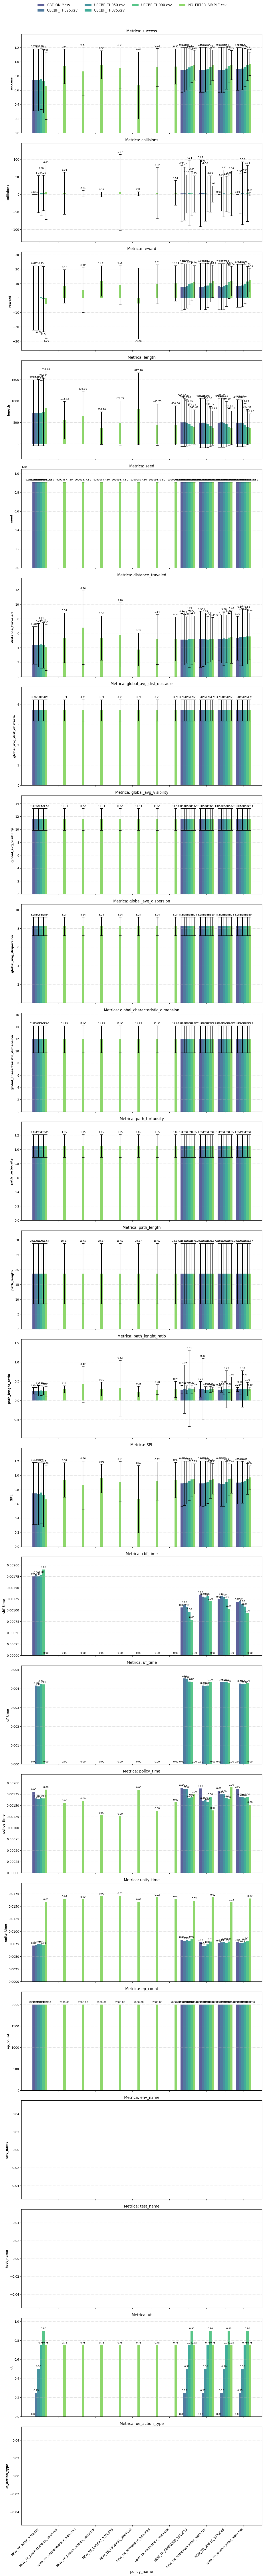

In [ ]:
plotta_confronto_csv_final(ALL_CSV,  'policy_name')

In [17]:
with open('./remote_results/UECBF_TH025_5956060_info.json', 'r') as f:
    cos = json.loads(f.read())

In [20]:
cos['metadata']['obstacles_config']

{'wall_resolution': 24,
 'external_walls': True,
 'spawn_away_from_walls': True,
 'initial_fill_percentage': 0.45,
 'smoothing_iterations': 3,
 'fill_threshold': 6,
 'clear_threshold': 3}

In [18]:
for i in cos['data']:
    if i['collisions'] > 0:
        print(i['collisions'])

1
1
2
6
1
1
1
1
1
2
1
1
2
2
1
3
2
1
2


In [13]:
cos['data'][0].keys()

dict_keys(['id', 'success', 'collisions', 'reward', 'length', 'seed', 'distance_traveled', 'global_avg_dist_obstacle', 'global_avg_visibility', 'global_avg_dispersion', 'global_characteristic_dimension', 'path_tortuosity', 'path_length'])

Episodi per ['NEW_TR_BASE_5746072']: 1997.2
Episodi per ['NEW_TR_SIMPLE_5770545']: 1998.2
Episodi per ['NEW_TR_SIMPLEWP_5819553']: 1997.4
Episodi per ['NEW_TR_SIMPLE_EASY_5804798']: 1997.6
Episodi per ['NEW_TR_SIMPLEWP_EASY_5841772']: 1997.6


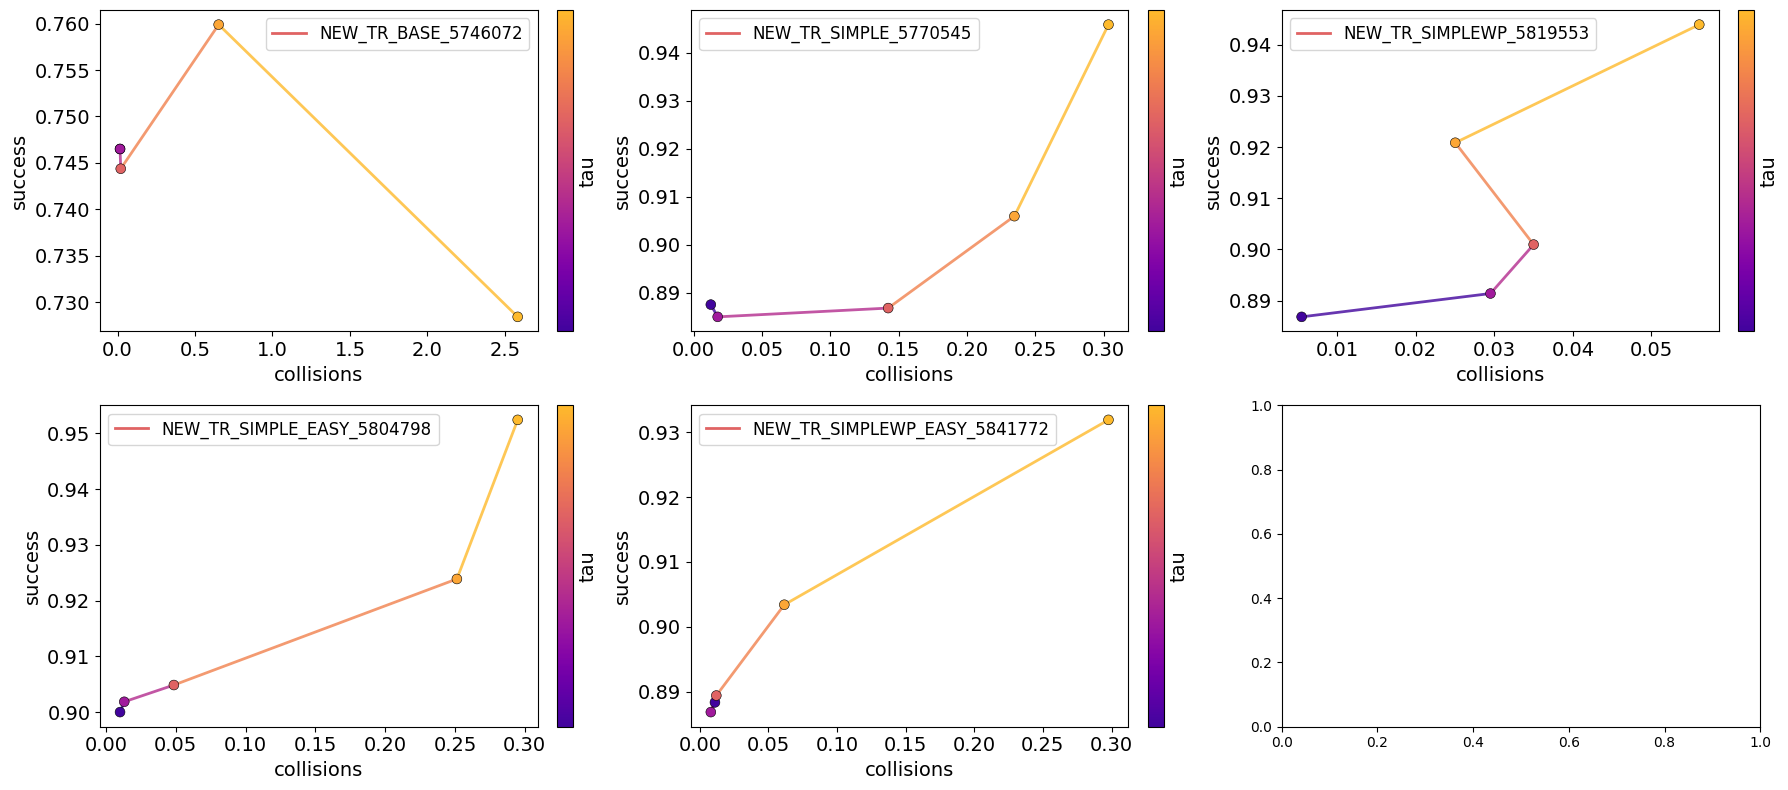

In [24]:
multy_plot_filtered(NO_FILTER_CSV, 'collisions', 'success', p_names, 3, lambda x: x['collisions'] < 50 , 0.0)

# Episodi difficili (pt > 1.2)

Episodi per ['basic_1_4205364']: 606.2
Episodi per ['simple_0_4164735']: 609.0
Episodi per ['simple_wp_1_4599899']: 614.0
Episodi per ['complex_1_4165576']: 604.7
Episodi per ['complex_wp_1_4611744']: 0.0


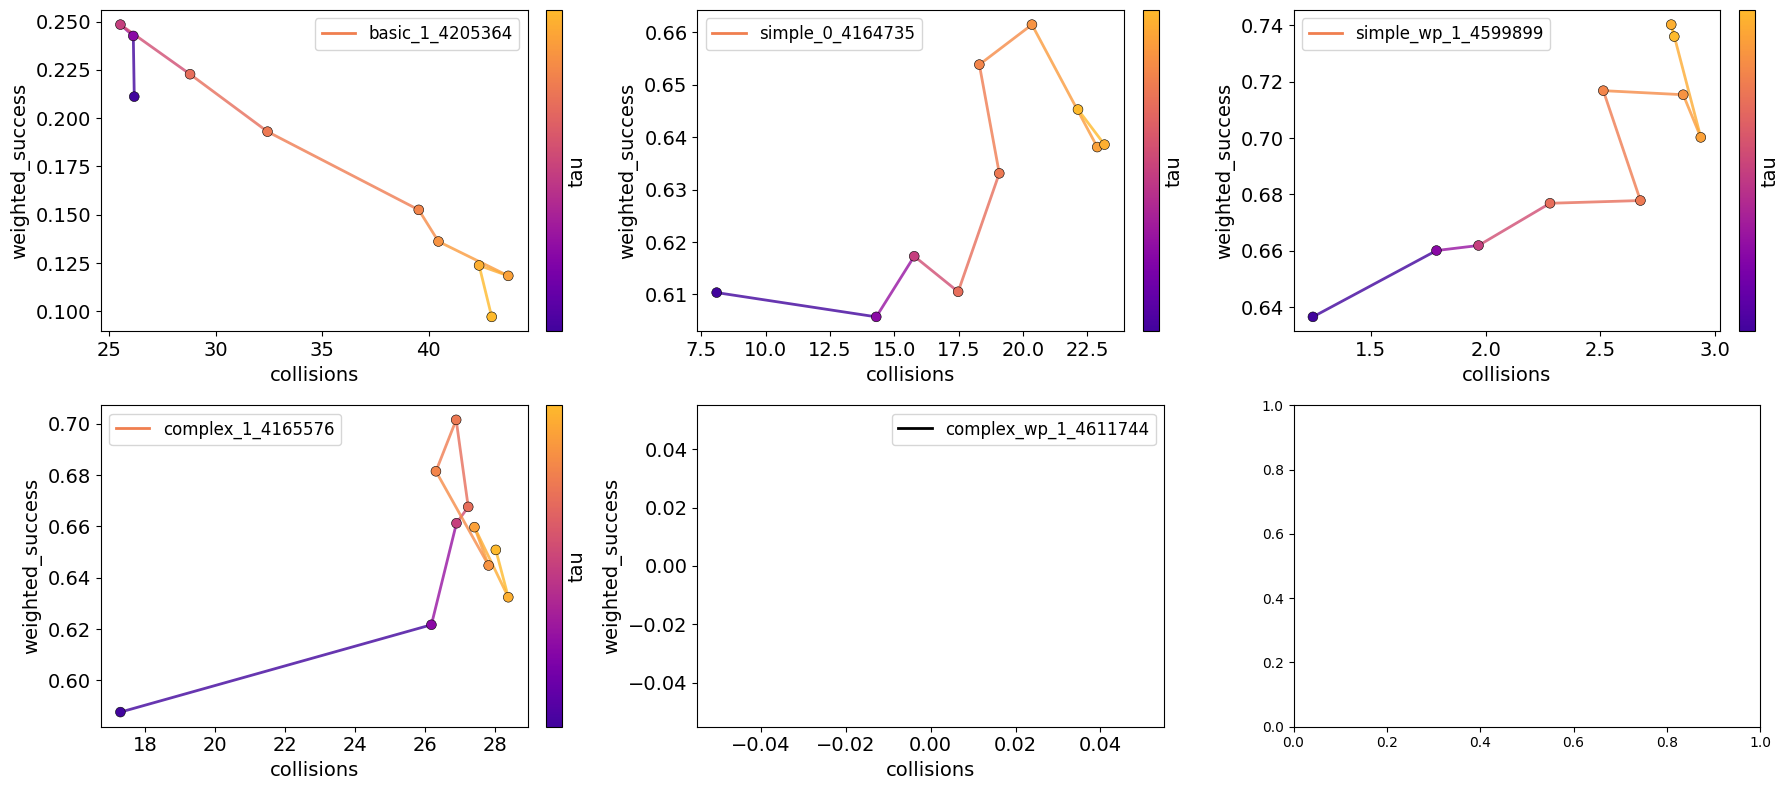

In [7]:
multy_plot_filtered(csvs, 'collisions', 'weighted_success', 3, lambda x: ( x['path_tortuosity'] > 1.2), 0.05)

Episodi per ['basic_1_4205364']: 604.9
Episodi per ['simple_0_4164735']: 609.0
Episodi per ['simple_wp_1_4599899']: 613.8
Episodi per ['complex_1_4165576']: 604.5
Episodi per ['complex_wp_1_4611744']: 0.0


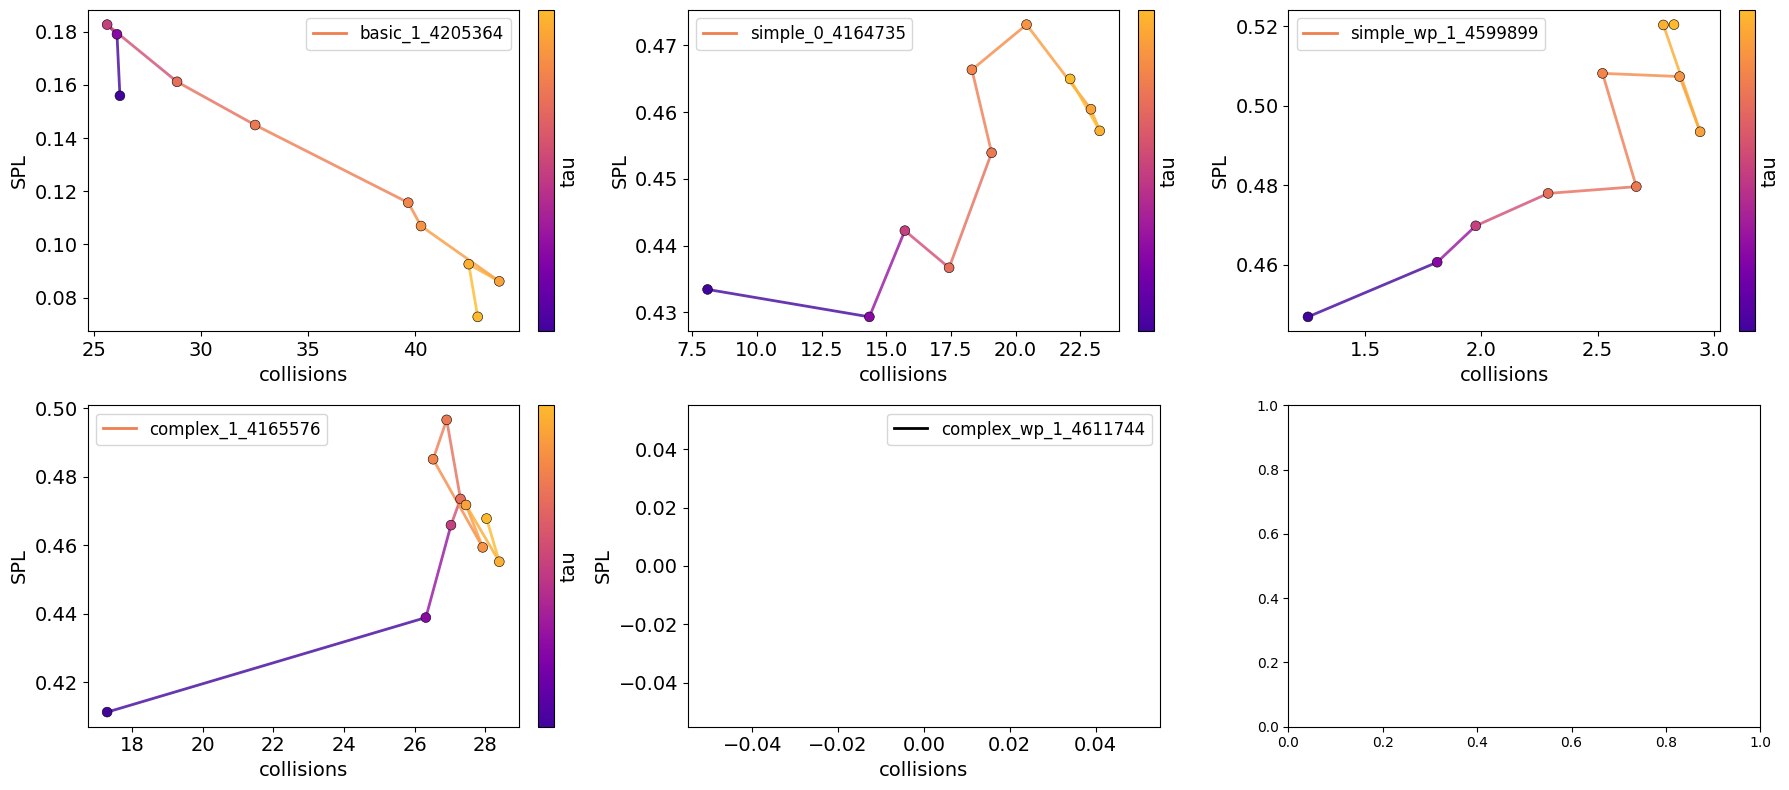

In [8]:
multy_plot_filtered(csvs, 'collisions', 'SPL', 3, lambda x: ( x['path_tortuosity'] > 1.2), 0.05)

# Episodi Semplici (pt < 1.2)

Episodi per ['basic_1_4205364']: 1203.4
Episodi per ['simple_0_4164735']: 1212.8
Episodi per ['simple_wp_1_4599899']: 1207.6
Episodi per ['complex_1_4165576']: 1207.4
Episodi per ['complex_wp_1_4611744']: 0.0


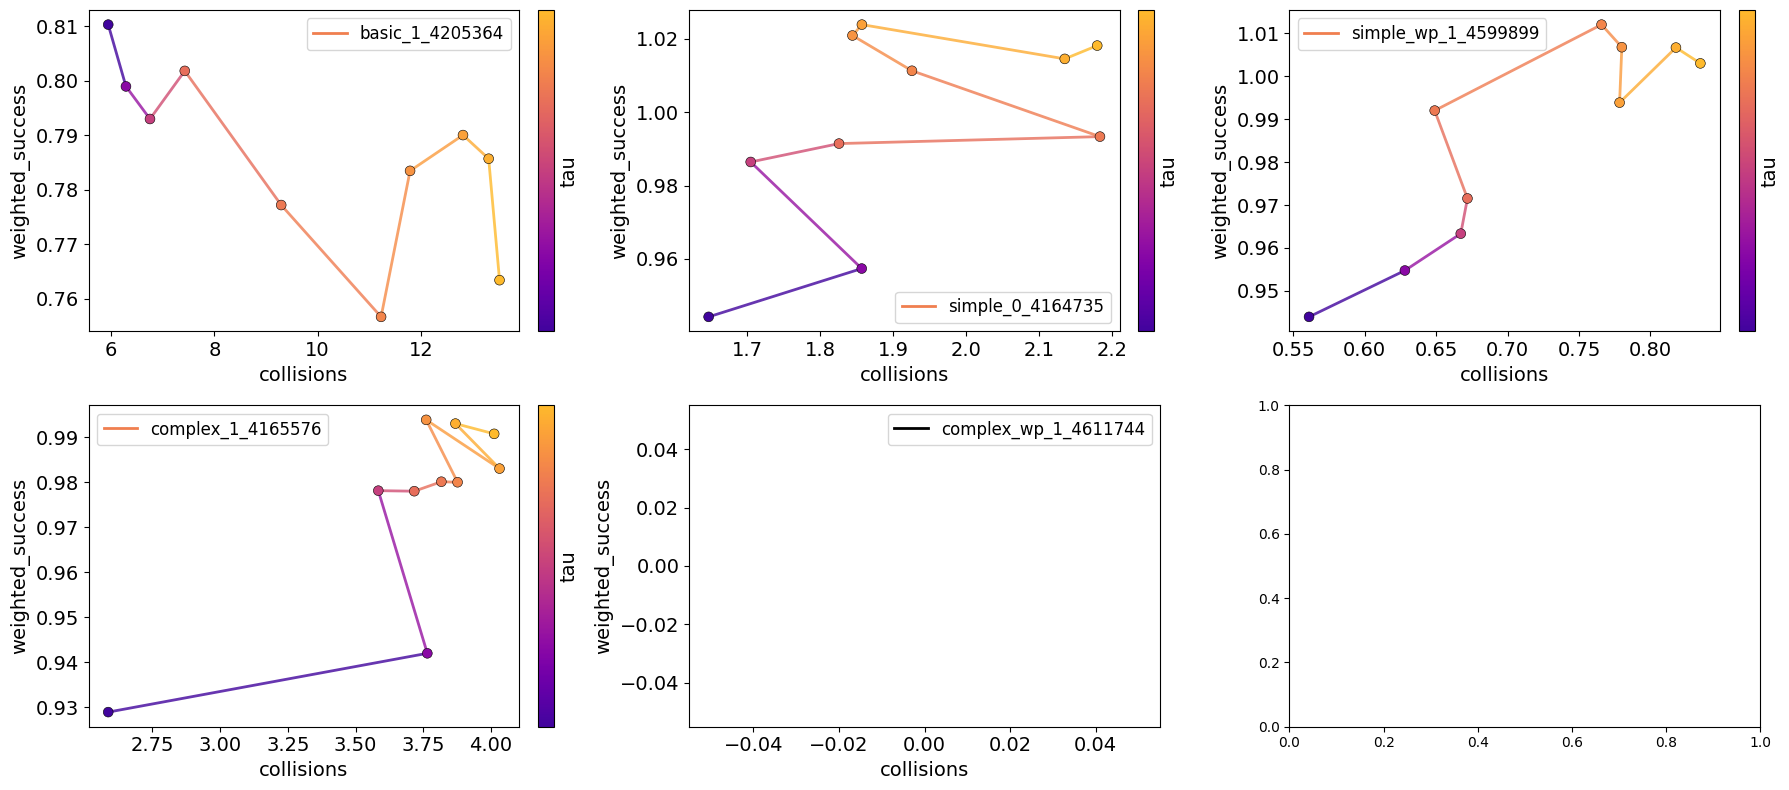

In [9]:
multy_plot_filtered(csvs, 'collisions', 'weighted_success', 3, lambda x: ( x['path_tortuosity'] < 1.2), 0.05)

Episodi per ['basic_1_4205364']: 1203.4
Episodi per ['simple_0_4164735']: 1212.7
Episodi per ['simple_wp_1_4599899']: 1206.6
Episodi per ['complex_1_4165576']: 1206.8
Episodi per ['complex_wp_1_4611744']: 0.0


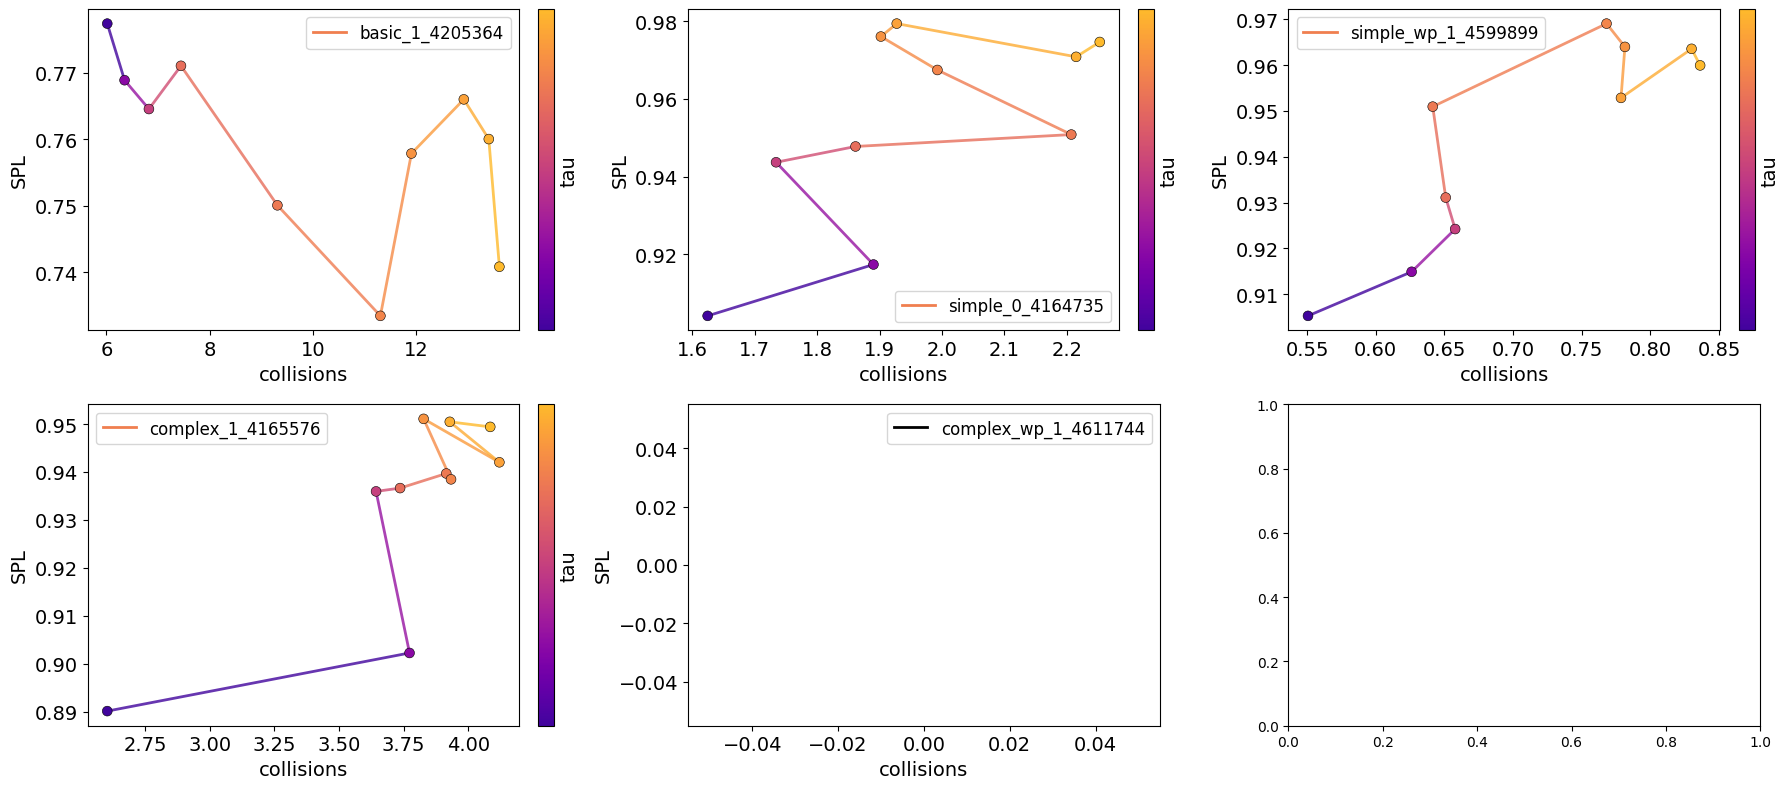

In [10]:
multy_plot_filtered(csvs, 'collisions', 'SPL', 3, lambda x: ( x['path_tortuosity'] < 1.2), 0.05)

COSA VOGLIO FARE

1. testare con cbf SENZA min forward velocit. Per come è ora troppe collisioni inutili e premiano attivazioni siperflue, magari  ridurre b_safe.

QUELLO CHE SAPPIAMO

    1. Esiste generalmente un valore di tau per cui la policy collide meno e raggiuge successo molto simile a prima, ottimo compromesso. l'attivazione non sistematica delle CBF beneficia le prestazioni

COSA SAREBBE INTERESSANTE SAPERE

    1. Analisi su Tau: esiste un modo più concreto per individuare tau o un meccanismo migliore per usare l'incertezza (non un solo valore ma valori per osservazione)? incertezza epistemica?

    2. Indipendensa tra UF e distanza ostacoli: controllare la dipendenza tra le due metriche, non dovrebbe essere troppo forte, soprattutto in un ambiente OOD

    3. Robustezza in Scenari OOD: Se l'incertezza è veramente epistemica deve funzionare bene in ambienti OOD, problema: quali sono ambienti OOD che però sono gestiti bene dalle CBF e quindi le collisioni sono il problema prevenibile?

    4. Capacità Anticipatoria dell'Incertezza: (già  visto in test tesi) riuscire a verificare e valutare quanto il UF è anticipatorio di un pericolo. (magari test con UF e non CBF per controllare attivazioni e collisioni)

Baseline:
LagSAC (SAC con Lagrangiana e poi PPO)

Test:
cilindri fissi
cilindri in movimento

Metriche:
Smoothness

NON METTERE GOAL NEGLI ANGOLI O VICINO AI MURI

In [11]:
with open('./remote_results/final_results/SAMPLE15_0900_5452656_transitions.json', 'r') as f:
    tr = json.loads(f.read())
with open('./remote_results/final_results/SAMPLE15_0900_5452656_info.json', 'r') as f:
    info = json.loads(f.read())

In [12]:
ue = load_trained_ensemble('./unc_models_sample/unc_simple_0_4164735', (21+7)*4 + 2, (21 + 7), 'cpu')[0]

Caricamento di 10 modelli elite...


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_density_analysis(dist_array, unc_array, name_unc="Epistemica", bins=40):
    """
    Crea un Joint Plot: 
    - Scatter 2D discretizzato (Hexbin) per la densità.
    - Istogrammi marginali sugli assi per la distribuzione singola.
    """
    # Creiamo la figura con una griglia per i marginali
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(4, 4, hspace=0.1, wspace=0.1)

    # Assi principale, superiore (istogramma X) e laterale (istogramma Y)
    ax_joint = fig.add_subplot(gs[1:4, 0:3])
    ax_marg_x = fig.add_subplot(gs[0, 0:3], sharex=ax_joint)
    ax_marg_y = fig.add_subplot(gs[1:4, 3], sharey=ax_joint)

    # 1. Plot Principale: Discretizzazione 2D con Hexbin
    # Cmin=1 evita di colorare le zone con zero campioni
    hb = ax_joint.hexbin(dist_array, unc_array, gridsize=bins, 
                         cmap='viridis', bins='log', mincnt=1)
    
    # 2. Istogramma Superiore (Distanza Ostacoli)
    ax_marg_x.hist(dist_array, bins=bins, color='navy', alpha=0.7, rwidth=0.8)
    ax_marg_x.set_title(f"Distribuzione Incertezza {name_unc} vs Distanza Ostacoli", fontsize=14)
    
    # 3. Istogramma Laterale (Incertezza)
    ax_marg_y.hist(unc_array, bins=bins, orientation='horizontal', 
                   color='darkred', alpha=0.7, rwidth=0.8)

    # Pulizia layout: rimuoviamo le label degli assi marginali
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    # Labels assi principali
    ax_joint.set_xlabel("Distanza Minima Ostacoli (Normalizzata)", fontsize=12)
    ax_joint.set_ylabel(f"Incertezza {name_unc}", fontsize=12)

    # Aggiungiamo la colorbar per la densità
    cb_ax = fig.add_axes([0.95, 0.25, 0.02, 0.5]) # [left, bottom, width, height]
    fig.colorbar(hb, cax=cb_ax, label='Log10(Conteggio punti)')

    plt.show()

# Esempio di utilizzo:
# plot_density_analysis(dist_minima, epi_plot, name_unc="Epistemica")

In [14]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

def sample_ep_ad_plot(transitions, info, ensamble):

    random_idx = random.randrange(len(info))
    print(f'episodio scelto: {random_idx}')
    
    ep = torch.tensor(transitions[random_idx], dtype=torch.float32, device='cpu')
    i = info[random_idx]
    
    aleatoria, epistemica = predict_uncertainty(ensamble, ep)
    
    mean_dist = ep[:,21*3: 21*4].mean(dim=1).numpy()
    
    
    return plot_density_analysis(mean_dist, epistemica.numpy())

episodio scelto: 1873


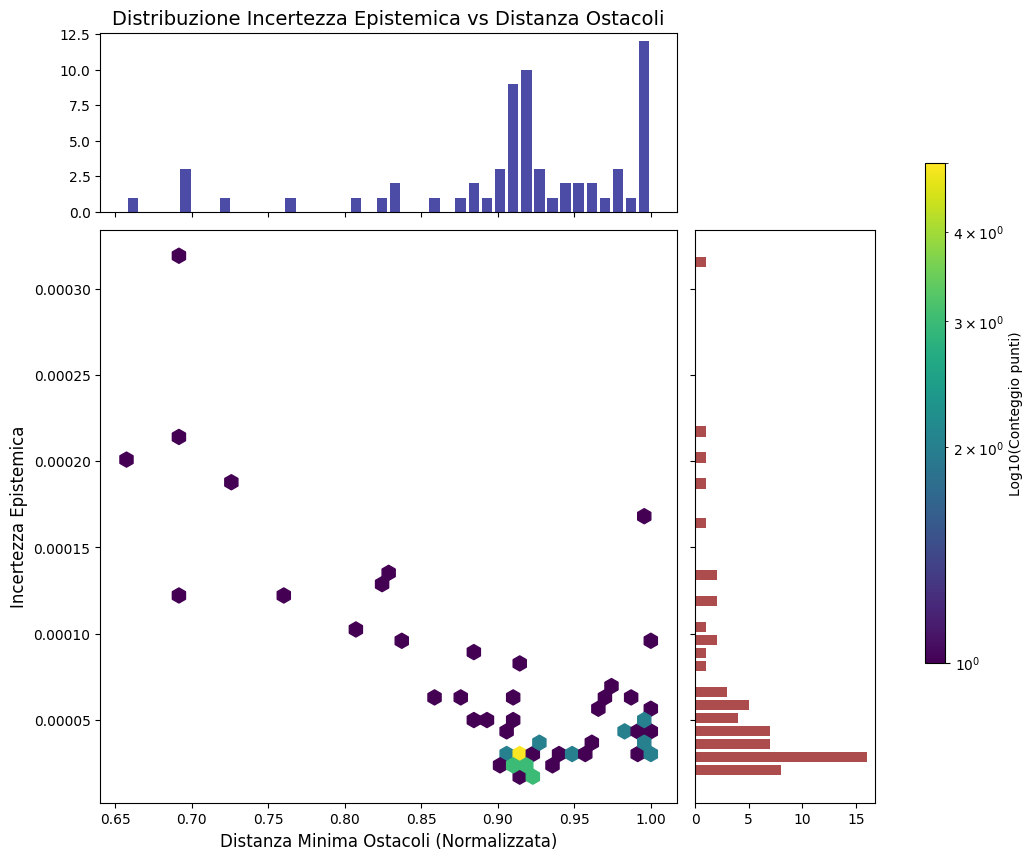

In [15]:
sample_ep_ad_plot(tr, info['data'], ue)